In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [3]:
bank_data =pd.read_csv('bank-full.csv', delimiter=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank_data.shape

(45211, 17)

In [5]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
bank_data.var()

age         1.127581e+02
balance     9.270599e+06
day         6.926361e+01
duration    6.632057e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64

In [9]:
bank_data.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [10]:
bank_data.kurt()

age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

In [11]:
# Missing Values

bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
# as shows there is no null records in the given dataset

In [12]:
# duplicat values

bank_data[bank_data.duplicated()].shape

(0, 17)

In [13]:
bank_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

* Descrete and Continuous Variables

In [14]:
discrete_feature = [feature for feature in bank_data.columns if len(bank_data[feature].unique())<20 and feature]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 10


In [15]:
continuous_feature = [feature for feature in bank_data.columns if bank_data[feature].dtype!='O' and feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


* EDA

In [16]:
# Correlation

bank_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


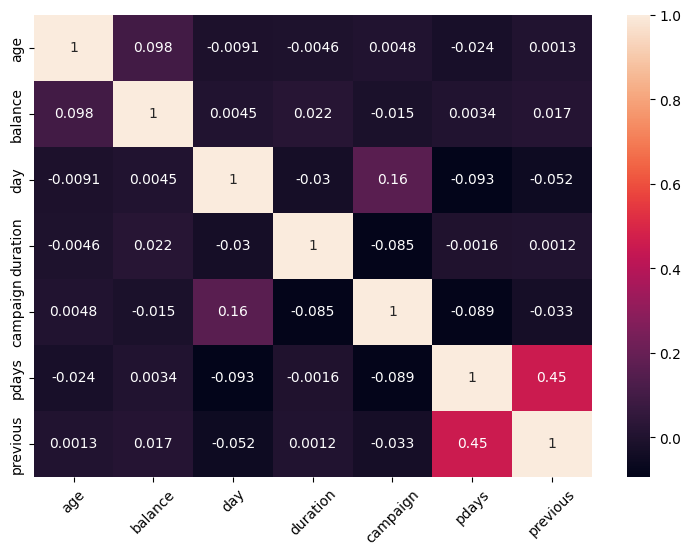

In [17]:
fig = plt.figure(figsize= (9,6))
sns.heatmap(bank_data.corr(), annot=True)
plt.xticks(rotation=45)
plt.show()

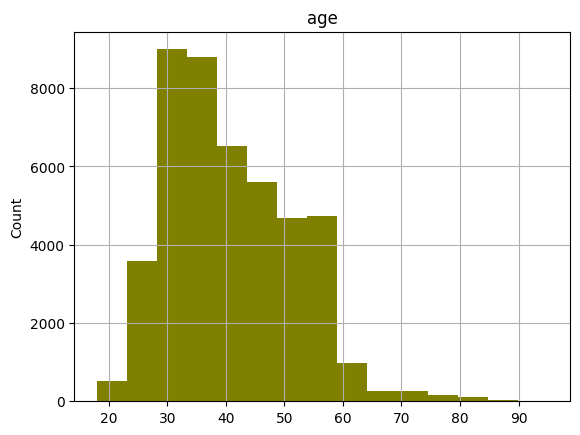

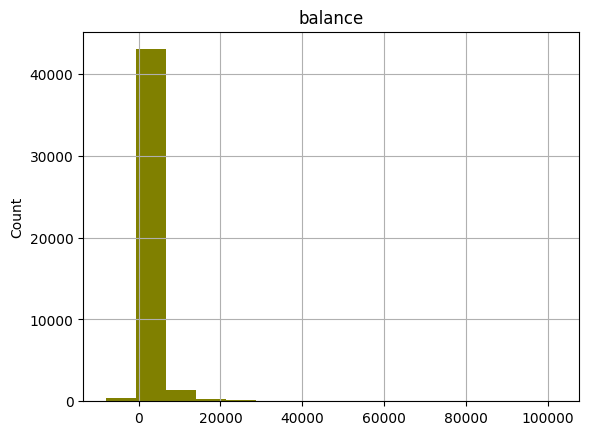

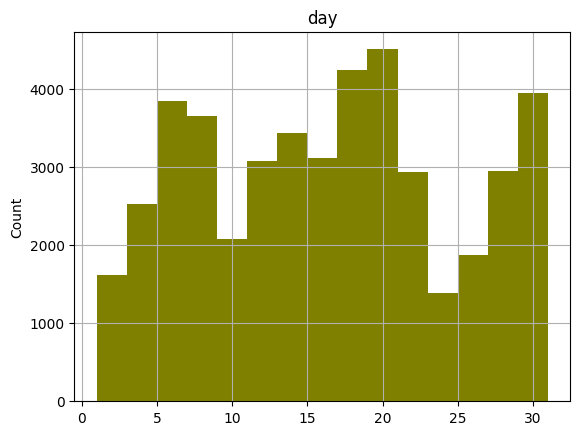

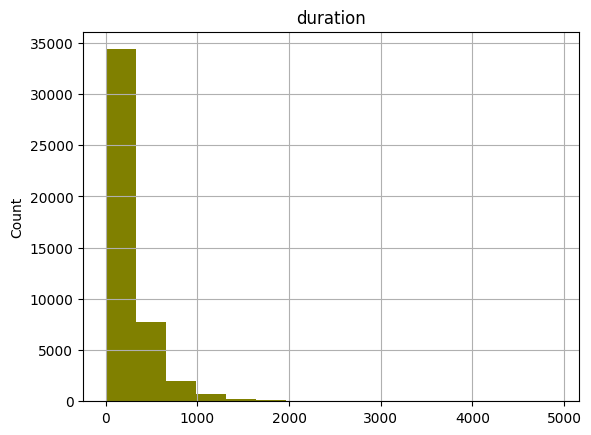

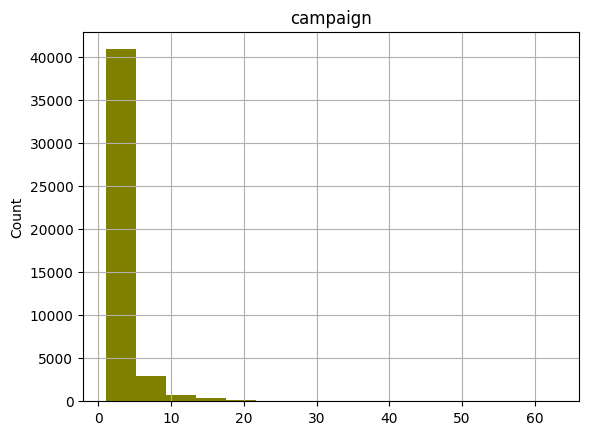

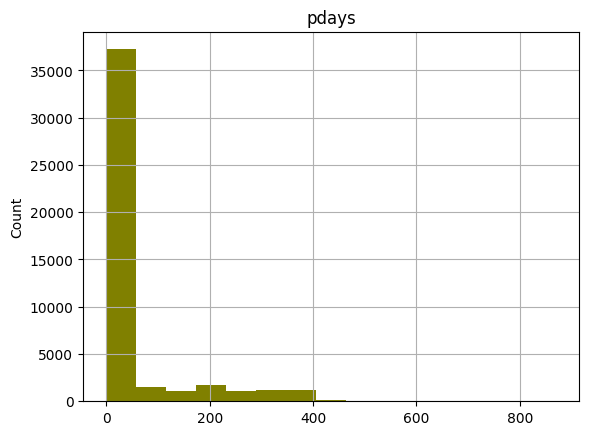

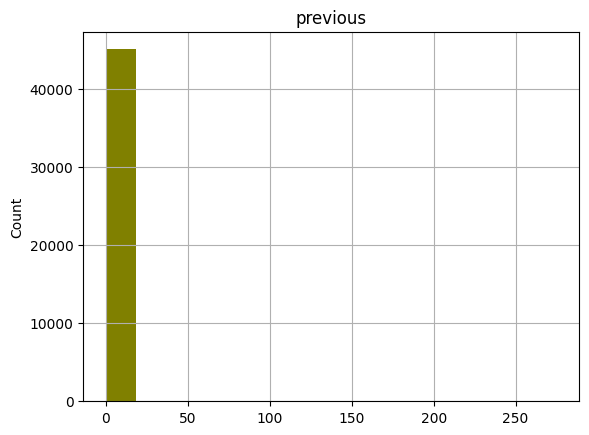

In [22]:
# Analyze Continuous Values

for feature in continuous_feature:
    bank_data1 = bank_data.copy()
    bank_data1[feature].hist(bins=15, color='olive')
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

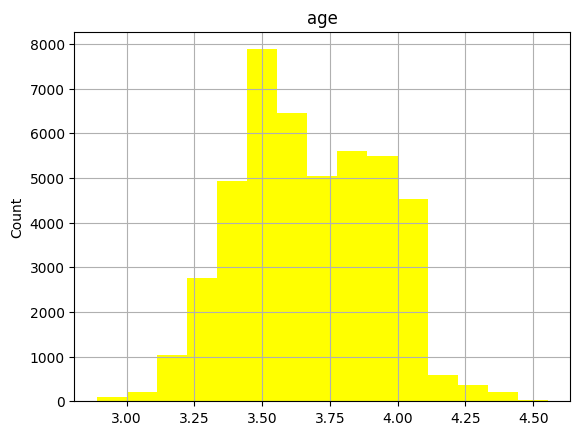

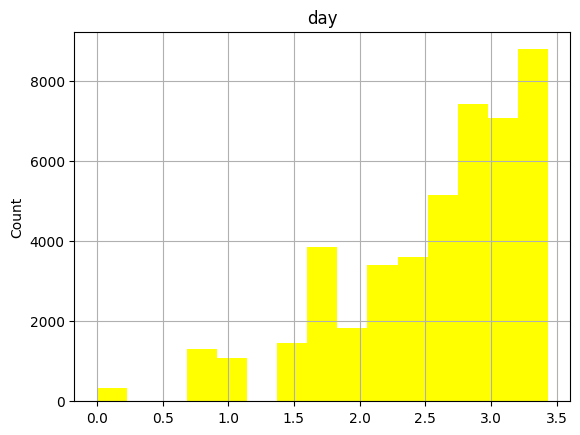

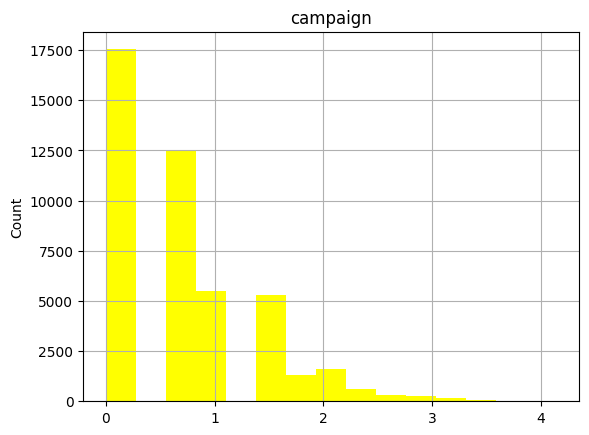

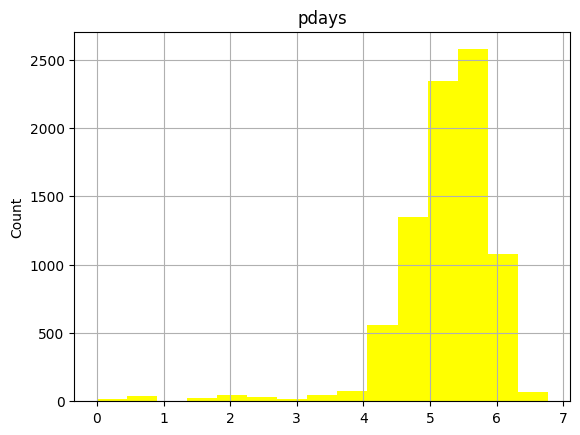

In [27]:
# Log Transformation

for feature in continuous_feature:
    bank_data2 = bank_data.copy()
    if 0 in bank_data2[feature].unique():
        pass
    else:
        bank_data2[feature] = np.log(bank_data2[feature])
        bank_data2[feature].hist(bins=15, color = 'yellow')
        plt.ylabel('Count')
        plt.title(feature)
        plt.show()

In [30]:
# One-Hot Encoding of categorical Variables

data1=pd.get_dummies(bank_data,columns=['job','marital','education','contact','poutcome'])
data1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [31]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   month                45211 non-null  object
 7   duration             45211 non-null  int64 
 8   campaign             45211 non-null  int64 
 9   pdays                45211 non-null  int64 
 10  previous             45211 non-null  int64 
 11  y                    45211 non-null  object
 12  job_admin.           45211 non-null  uint8 
 13  job_blue-collar      45211 non-null  uint8 
 14  job_entrepreneur     45211 non-null  uint8 
 15  job_housemaid        45211 non-null  uint8 
 16  job_

In [32]:
# Custom Binary Encoding of Binary o/p variables

data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,nov,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,nov,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,nov,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [33]:
# Find and Replace Encoding for month categorical varaible
data1['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [34]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}

In [35]:
data1=data1.replace(order)

In [36]:
data1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [37]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int64
 12  job_admin.           45211 non-null  uint8
 13  job_blue-collar      45211 non-null  uint8
 14  job_entrepreneur     45211 non-null  uint8
 15  job_housemaid        45211 non-null  uint8
 16  job_management       4

* Outliers Detection

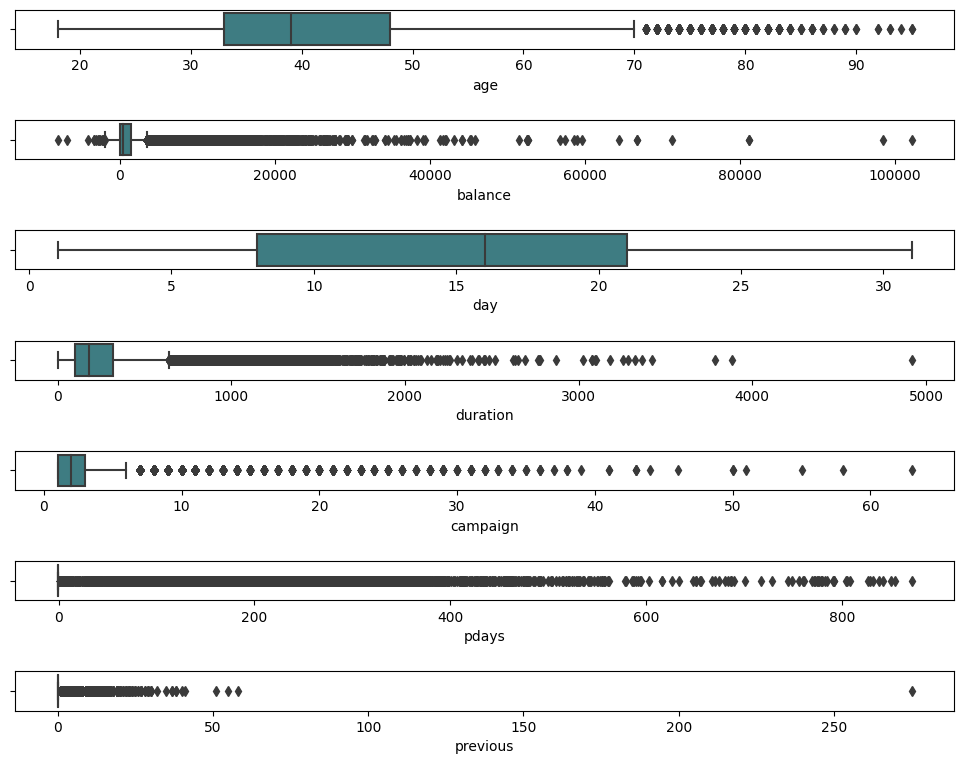

In [38]:
outlier = bank_data.copy()
fig, axes = plt.subplots(7,1,figsize=(10,8), sharex=False, sharey=False)
sns.boxplot(x='age',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='balance',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='day',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='duration',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='campaign',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='pdays',data=outlier,palette='crest',ax=axes[5])
sns.boxplot(x='previous',data=outlier,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

as you can see there are lot of outliers present in the dataframe but we can't drop them because the quantity of outliers are huge and can be important for model building.


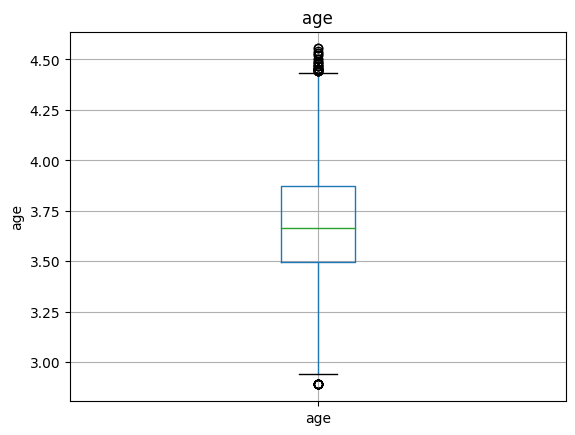

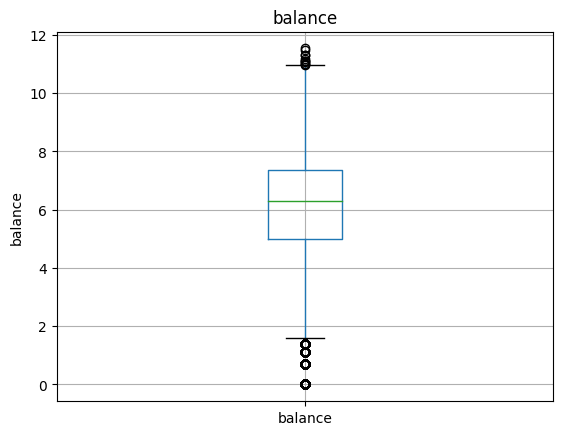

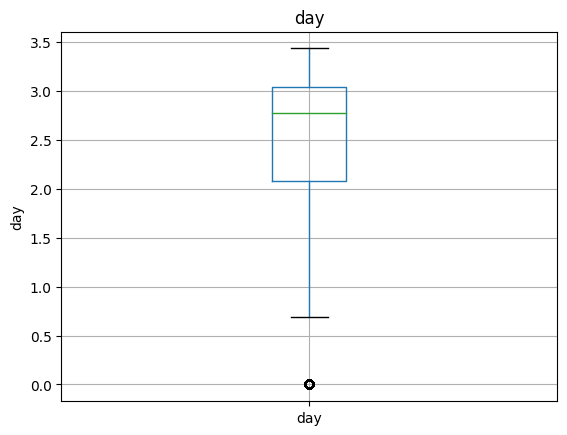

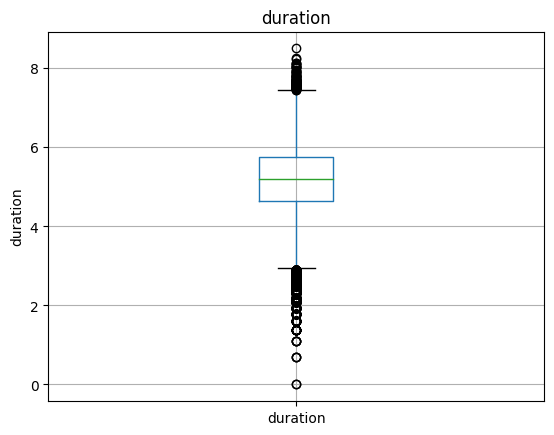

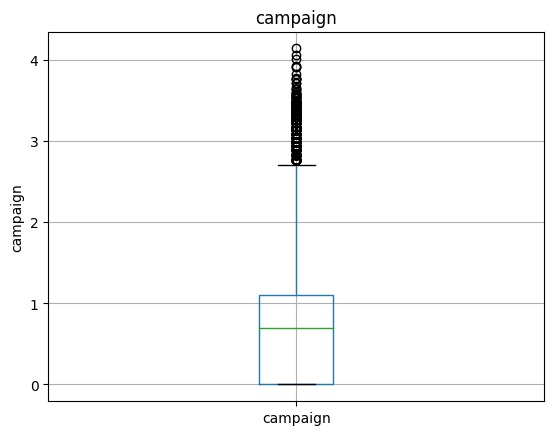

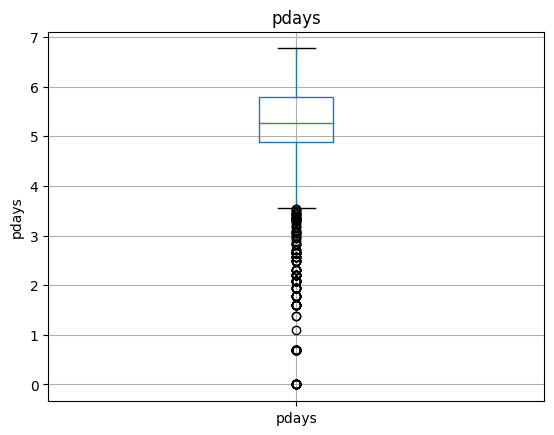

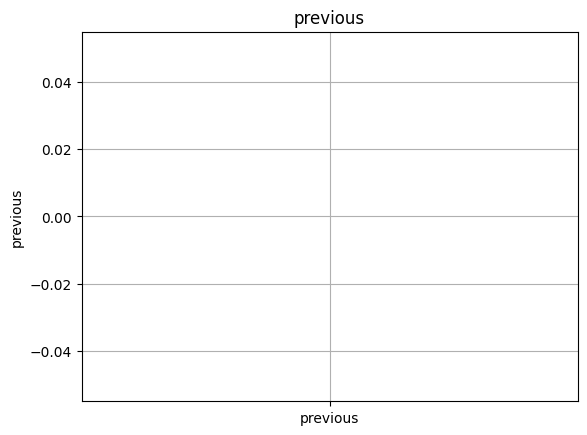

In [39]:
for feature in continuous_feature:
    bank_data3 = bank_data.copy()
    bank_data3[feature] = np.log(bank_data3[feature])
    bank_data3.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [ ]:
# Data Preprocessing

In [47]:
bank_data[['job','marital','education','default','housing','loan','contact','poutcome','month','y']] = bank_data[
    ['job','marital','education','default','housing','loan','contact','poutcome','month','y']].astype('category')
bank_data_new = bank_data

In [48]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [49]:
# Label Encoding

bank_data_new['month'] = bank_data_new['month'].cat.codes
bank_data_new['job'] = bank_data_new['job'].cat.codes
bank_data_new['marital'] = bank_data_new['marital'].cat.codes
bank_data_new['education'] = bank_data_new['education'].cat.codes
bank_data_new['default'] = bank_data_new['default'].cat.codes
bank_data_new['housing'] = bank_data_new['housing'].cat.codes
bank_data_new['loan'] = bank_data_new['loan'].cat.codes
bank_data_new['contact'] = bank_data_new['contact'].cat.codes
bank_data_new['poutcome'] = bank_data_new['poutcome'].cat.codes
bank_data_new['y'] = bank_data_new['y'].cat.codes

* Model Building

In [50]:
x1 = bank_data_new.drop('y', axis=1)
y1 = bank_data_new[['y']]

In [51]:
x1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [52]:
y1

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.20,random_state=12)
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (36168, 16)
Shape of X_test  :  (9043, 16)
Shape of y_train :  (36168, 1)
Shape of y_test  :  (9043, 1)


In [54]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [55]:
logistic_model.coef_

# coef_ attribute returns an array of the coefficients of the linear regression equation

array([[-2.38915708e-02,  1.59597446e-02, -1.11382518e-01,
        -1.68375804e-02, -5.34140437e-03,  3.56048792e-05,
        -2.19088837e-01, -6.56146892e-02, -2.25556759e-01,
        -1.97718262e-02, -6.34731132e-02,  3.49815048e-03,
        -3.20316792e-01, -9.64775977e-04,  1.31215675e-01,
        -2.13369664e-01]])

In [56]:
logistic_model.intercept_

array([-0.08474103])

In [57]:
# MinMaxScaler

scalar = MinMaxScaler(feature_range= (0,1))
scalar.fit(bank_data_new)
scaled_x = scalar.transform(bank_data_new)

In [58]:
scaled_x

array([[0.51948052, 0.36363636, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.33766234, 0.81818182, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19480519, 0.18181818, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.7012987 , 0.45454545, 0.5       , ..., 0.01090909, 0.66666667,
        1.        ],
       [0.50649351, 0.09090909, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.24675325, 0.18181818, 0.5       , ..., 0.04      , 0.33333333,
        0.        ]])

In [59]:
classifier1 = LogisticRegression()
classifier1.fit(scaled_x,y1)

LogisticRegression()

In [60]:
classifier1.coef_

array([[ 0.0870051 ,  0.04775924,  0.12651324,  0.16252677, -0.0576052 ,
         0.03974224, -0.34339486, -0.23072377, -0.46707242, -0.10404694,
         0.124258  ,  0.90757706, -0.1296082 ,  0.21393142,  0.01923177,
        -0.1480058 , 13.73203525]])

In [61]:
proba1 = classifier1.predict_proba(scaled_x)
proba1

array([[9.99760781e-01, 2.39218924e-04],
       [9.99762234e-01, 2.37766449e-04],
       [9.99832546e-01, 1.67453699e-04],
       ...,
       [1.67888481e-03, 9.98321115e-01],
       [9.99598875e-01, 4.01125023e-04],
       [9.99437111e-01, 5.62889153e-04]])

In [62]:
y_pred1 = classifier1.predict(scaled_x)
y_pred1

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

* Model Testing

In [63]:
# Train Data

y_pred_train1 = logistic_model.predict(x_train)

In [64]:
print(confusion_matrix(y_train, y_pred_train1))

[[31349   580]
 [ 3506   733]]


In [65]:
print(classification_report(y_train,y_pred_train1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.17      0.26      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [66]:
accuracy_score(y_train,y_pred_train1)

0.8870272063702721

AUC score : 81.62%


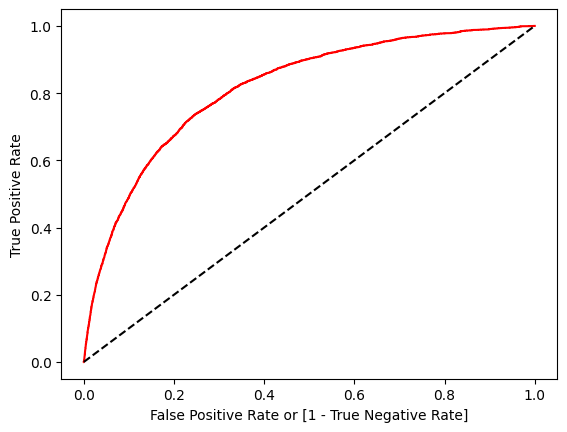

In [68]:
fpr, tpr, thresholds = roc_curve(y_train,logistic_model.predict_proba (x_train)[:,1])

auc = roc_auc_score(y_train,logistic_model.predict_proba (x_train)[:,1])
print('AUC score : {:.2f}%'.format(auc*100))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [70]:
classification_report1 = classification_report(y_train,y_pred_train1)
print(classification_report1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31929
           1       0.56      0.17      0.26      4239

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168



In [71]:
# Test Data

y_pred_test1 = logistic_model.predict(x_test)

In [72]:
print(confusion_matrix(y_test,y_pred_test1))

[[7850  143]
 [ 853  197]]


In [73]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.58      0.19      0.28      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [74]:
accuracy_score(y_test,y_pred_test1)

0.8898595598805706

AUC score : 83.00%


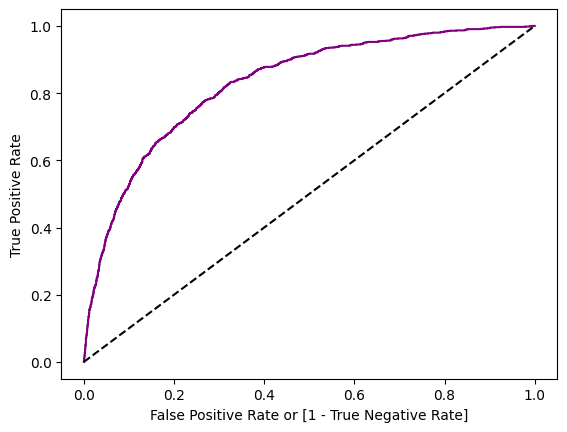

In [78]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(y_test,logistic_model.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test,logistic_model.predict_proba (x_test)[:,1])
print('AUC score : {:.2f}%'.format(auc*100))

plt.plot(fpr, tpr, color='purple', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [76]:
classification_report2 = classification_report(y_test,y_pred_test1)
print(classification_report2)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7993
           1       0.58      0.19      0.28      1050

    accuracy                           0.89      9043
   macro avg       0.74      0.58      0.61      9043
weighted avg       0.86      0.89      0.86      9043



In [77]:
print('Training set score : {:.2f}%'.format(logistic_model.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(logistic_model.score(x_test, y_test)*100))

Training set score : 88.70%
Test set score     : 88.99%
